In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [2]:
df=pd.read_csv(r"C:\Users\VivekSharma\Downloads\archive (3)\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### Scaling

In [5]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

### Model Fitting

In [8]:
model=Sequential()
model.add(Dense(units=32,activation='relu',input_dim=8))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X,y,batch_size=32,validation_data=(xtest,ytest),epochs=5)

Epoch 1/5
24/24 [==============================] - 1s 7ms/step - loss: 0.6825 - accuracy: 0.6055 - val_loss: 0.6733 - val_accuracy: 0.6169
Epoch 2/5
24/24 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6484 - val_loss: 0.6235 - val_accuracy: 0.6558
Epoch 3/5
24/24 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7031 - val_loss: 0.5855 - val_accuracy: 0.7338
Epoch 4/5
24/24 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7240 - val_loss: 0.5567 - val_accuracy: 0.7792
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7474 - val_loss: 0.5338 - val_accuracy: 0.7727


### Task
1. How to select apropriate optimizer
2. Number of neuron in each hidden layer
3. how to select number of layer
4. All in one model

## Selecting right optimizer


In [9]:
#!pip install -U keras-tuner

In [10]:
import kerastuner as kt

C:\Users\VivekSharma\AppData\Local\Temp\ipykernel_17748\1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [11]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(32,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta']),
                 loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [12]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [13]:
tuner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

In [23]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.7792207598686218

Trial 2 summary
Hyperparameters:
optimizer: adam
Score: 0.7727272510528564

Trial 1 summary
Hyperparameters:
optimizer: sgd
Score: 0.6948052048683167

Trial 3 summary
Hyperparameters:
optimizer: adadelta
Score: 0.5064935088157654


In [17]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [20]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(xtrain,ytrain,batch_size=32,epochs=100,initial_epoch=6,validation_data=(xtest,ytest))

Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5281 - accuracy: 0.7443 - val_loss: 0.5195 - val_accuracy: 0.7662
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7557 - val_loss: 0.5078 - val_accuracy: 0.7662
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7655 - val_loss: 0.4976 - val_accuracy: 0.7922
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7671 - val_loss: 0.4911 - val_accuracy: 0.7857
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7671 - val_loss: 0.4851 - val_accuracy: 0.8117
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7704 - val_loss: 0.4819 - val_accuracy: 0.8117
Epoch 13/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7704 - val_loss: 0.4787 - val_accuracy: 0.8117
Epoch 14/

Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7964 - val_loss: 0.4671 - val_accuracy: 0.8052
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7997 - val_loss: 0.4672 - val_accuracy: 0.8052
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7964 - val_loss: 0.4673 - val_accuracy: 0.8052
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7964 - val_loss: 0.4668 - val_accuracy: 0.8052
Epoch 69/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7915 - val_loss: 0.4671 - val_accuracy: 0.8052
Epoch 70/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7964 - val_loss: 0.4671 - val_accuracy: 0.8117
Epoch 71/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.7997 - val_loss: 0.4673 - val_accuracy: 0.8117
Epoch 

## Selecting right number of neurons

In [37]:
def build_model(hp):
    model=Sequential()
    units=hp.Int('unit',8,128)
    model.add(Dense(units=units,activation='relu',input_dim=8))
    model.add(Dense(units=1,activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model


tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir1',project_name='3')

tuner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

tuner.results_summary()

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.7857142686843872
Total elapsed time: 00h 00m 05s
Results summary
Results in mydir1\3
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
unit: 79
Score: 0.7857142686843872

Trial 3 summary
Hyperparameters:
unit: 40
Score: 0.7857142686843872

Trial 4 summary
Hyperparameters:
unit: 125
Score: 0.7792207598686218

Trial 1 summary
Hyperparameters:
unit: 38
Score: 0.7597402334213257

Trial 0 summary
Hyperparameters:
unit: 27
Score: 0.7337662577629089


In [39]:
tuner.get_best_hyperparameters()[0].values

{'unit': 79}

In [40]:
model=tuner.get_best_models(num_models=1)[0]

In [41]:
model.fit(xtrain,ytrain,batch_size=32,validation_data=(xtest,ytest),epochs=100,initial_epoch=6)

Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5388 - accuracy: 0.7541 - val_loss: 0.5213 - val_accuracy: 0.7857
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7622 - val_loss: 0.4992 - val_accuracy: 0.7792
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7655 - val_loss: 0.4876 - val_accuracy: 0.7792
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7687 - val_loss: 0.4798 - val_accuracy: 0.7857
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7752 - val_loss: 0.4753 - val_accuracy: 0.7857
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7834 - val_loss: 0.4724 - val_accuracy: 0.7857
Epoch 13/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7834 - val_loss: 0.4705 - val_accuracy: 0.7857
Epoch 14/

Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8078 - val_loss: 0.4592 - val_accuracy: 0.8117
Epoch 66/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8111 - val_loss: 0.4609 - val_accuracy: 0.8117
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8062 - val_loss: 0.4613 - val_accuracy: 0.8182
Epoch 68/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8111 - val_loss: 0.4615 - val_accuracy: 0.8117
Epoch 69/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8127 - val_loss: 0.4596 - val_accuracy: 0.8052
Epoch 70/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8176 - val_loss: 0.4589 - val_accuracy: 0.7987
Epoch 71/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8127 - val_loss: 0.4585 - val_accuracy: 0.8182
Epoch 

## Selecting number of layers

In [42]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(79,activation='relu',input_dim=8))
    
    for i in range(hp.Int('num_layer',min_value=1,max_value=10)):
        model.add(Dense(72,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

tunner=kt.RandomSearch(build_model,objective='val_accuracy', max_trials=3, directory='mydir',project_name='4')
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 01s]
val_accuracy: 0.8311688303947449

Best val_accuracy So Far: 0.8311688303947449
Total elapsed time: 00h 00m 04s


In [43]:
tunner.results_summary()

Results summary
Results in mydir\4
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layer: 2
Score: 0.8311688303947449

Trial 0 summary
Hyperparameters:
num_layer: 8
Score: 0.798701286315918

Trial 1 summary
Hyperparameters:
num_layer: 9
Score: 0.7922077775001526


In [45]:
model=tunner.get_best_models(num_models=1)[0]
model.fit(xtrain,ytrain,epochs=100,initial_epoch=5,validation_data=(xtest,ytest))

Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4684 - accuracy: 0.7687 - val_loss: 0.4642 - val_accuracy: 0.8182
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7736 - val_loss: 0.4601 - val_accuracy: 0.8117
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7834 - val_loss: 0.4608 - val_accuracy: 0.8052
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7818 - val_loss: 0.4590 - val_accuracy: 0.8247
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.7834 - val_loss: 0.4807 - val_accuracy: 0.7987
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7866 - val_loss: 0.4657 - val_accuracy: 0.7922
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.7883 - val_loss: 0.4943 - val_accuracy: 0.7987
Epoch 13/1

Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9349 - val_loss: 0.6292 - val_accuracy: 0.7597
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.9381 - val_loss: 0.6496 - val_accuracy: 0.7922
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9381 - val_loss: 0.7215 - val_accuracy: 0.7597
Epoch 67/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.9381 - val_loss: 0.6058 - val_accuracy: 0.7857
Epoch 68/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1705 - accuracy: 0.9349 - val_loss: 0.6511 - val_accuracy: 0.7857
Epoch 69/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1809 - accuracy: 0.9316 - val_loss: 0.6473 - val_accuracy: 0.7792
Epoch 70/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.9511 - val_loss: 0.7239 - val_accuracy: 0.7597
Epoch 

## APPLICATION OF ALL TOGETHER

In [65]:
def build_model(hp):
    model=Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter==0:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                    activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                    input_dim=8
                    )
                )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])))
        else:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                    activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])
                    )
                )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])))
        counter+=1
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta'])
                 ,loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model
    
tunner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='8')
    
            
        

In [66]:
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 01s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 04s


In [67]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 80,
 'activation0': 'tanh',
 'dropout0': 0.1,
 'optimizer': 'adam',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1}

In [68]:
model=tunner.get_best_models(num_models=1)[0]

In [70]:
history=model.fit(xtrain,ytrain,epochs=200,initial_epoch=6,validation_data=(xtest,ytest))

Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8078 - val_loss: 0.4505 - val_accuracy: 0.8052
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.7980 - val_loss: 0.4476 - val_accuracy: 0.8117
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.7948 - val_loss: 0.4453 - val_accuracy: 0.8182
Epoch 10/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.8062 - val_loss: 0.4488 - val_accuracy: 0.8052
Epoch 11/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8094 - val_loss: 0.4516 - val_accuracy: 0.7987
Epoch 12/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8046 - val_loss: 0.4512 - val_accuracy: 0.8052
Epoch 13/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8111 - val_loss: 0.4509 - val_accuracy: 0.8052
Epoch 14/

Epoch 65/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8208 - val_loss: 0.4620 - val_accuracy: 0.7987
Epoch 66/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8176 - val_loss: 0.4629 - val_accuracy: 0.7987
Epoch 67/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8094 - val_loss: 0.4685 - val_accuracy: 0.7922
Epoch 68/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8225 - val_loss: 0.4639 - val_accuracy: 0.7922
Epoch 69/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3979 - accuracy: 0.8143 - val_loss: 0.4663 - val_accuracy: 0.7857
Epoch 70/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8143 - val_loss: 0.4688 - val_accuracy: 0.7857
Epoch 71/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8192 - val_loss: 0.4650 - val_accuracy: 0.7922
Epoch 

20/20 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8241 - val_loss: 0.4730 - val_accuracy: 0.7922
Epoch 123/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8192 - val_loss: 0.4779 - val_accuracy: 0.7857
Epoch 124/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8176 - val_loss: 0.4792 - val_accuracy: 0.7922
Epoch 125/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8322 - val_loss: 0.4793 - val_accuracy: 0.7922
Epoch 126/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8355 - val_loss: 0.4763 - val_accuracy: 0.7922
Epoch 127/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8469 - val_loss: 0.4770 - val_accuracy: 0.7922
Epoch 128/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8469 - val_loss: 0.4753 - val_accuracy: 0.7922
Epoch 129/200

20/20 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8306 - val_loss: 0.4866 - val_accuracy: 0.7857
Epoch 180/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8355 - val_loss: 0.4785 - val_accuracy: 0.7922
Epoch 181/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.8225 - val_loss: 0.4783 - val_accuracy: 0.7857
Epoch 182/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8127 - val_loss: 0.4806 - val_accuracy: 0.7857
Epoch 183/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8371 - val_loss: 0.4819 - val_accuracy: 0.7792
Epoch 184/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8371 - val_loss: 0.4783 - val_accuracy: 0.8052
Epoch 185/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8306 - val_loss: 0.4768 - val_accuracy: 0.7792
Epoch 186/200

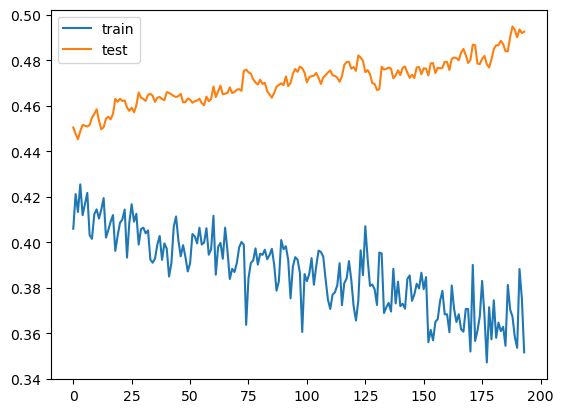

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="test")
plt.legend()
plt.show()

In [74]:
ytrain.value_counts()

0    401
1    213
Name: Outcome, dtype: int64

In [75]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64